In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

from PIL import Image

import imgkit

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

In [3]:
from maskrcnn_benchmark.config import cfg
from my_coco_predictor import COCODemo

In [4]:
config_file = "../configs/my_single_image_test.yaml";


# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

In [11]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.0001,
    weight_loading = "../model_0001000.pth"
)

find checkpoint1
Loading weight from ../model_0001000.pth.


In [12]:
import IPython
from COCO_Image_Viewer import CocoDataset

annotation_path = "../maskrcnn_benchmark/data/datasets/my_dataset/resized_images/trainval.json"
image_dir = "../maskrcnn_benchmark/data/datasets/my_dataset/resized_images"

coco_dataset = CocoDataset(annotation_path, image_dir)


# Dataset info

In [13]:
coco_dataset.display_info()
coco_dataset.display_licenses()
coco_dataset.display_categories()

Dataset Info:
Licenses:
Categories:
  super_category: battery
    id 0: battery

  super_category: camera
    id 1: camera

  super_category: connector
    id 2: connector

  super_category: motherboard
    id 3: motherboard

  super_category: screw
    id 4: screw



In [14]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img)
    plt.axis("off")
    
def imshow_gt(image_id):
    html = coco_dataset.display_image(image_id, use_url=False)
    IPython.display.HTML(html)

In [15]:
# from http://cocodataset.org/#explore?id=345434
image_id = 4

image = Image.open("../maskrcnn_benchmark/data/datasets/my_dataset/test_resized_images/" + coco_dataset.images[image_id]["file_name"])
image = np.array(image)

html = coco_dataset.display_image(image_id, use_url=False)
IPython.display.HTML(html)

Image:
  height: 480
  width: 640
  id: 4
  file_name: 6_color.png
  segmentations (8):
    20:blue:{'supercategory': 'camera', 'id': 1, 'name': 'camera'}
    21:purple:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    22:red:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    23:green:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    24:orange:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    25:salmon:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    26:pink:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    27:gold:{'supercategory': 'motherboard', 'id': 3, 'name': 'motherboard'}


objectness =  torch.Size([1, 15, 50, 67])
rpn_box_regression =  torch.Size([1, 60, 50, 67])
achors = 
[[BoxList(num_boxes=50250, image_width=1066, image_height=800, mode=xyxy)]]
anhcor[0][0][[0]].bbox
tensor([ 328., -280.,  679.,  423.])
BoxList(num_boxes=0, image_width=640, image_height=480, mode=xyxy)


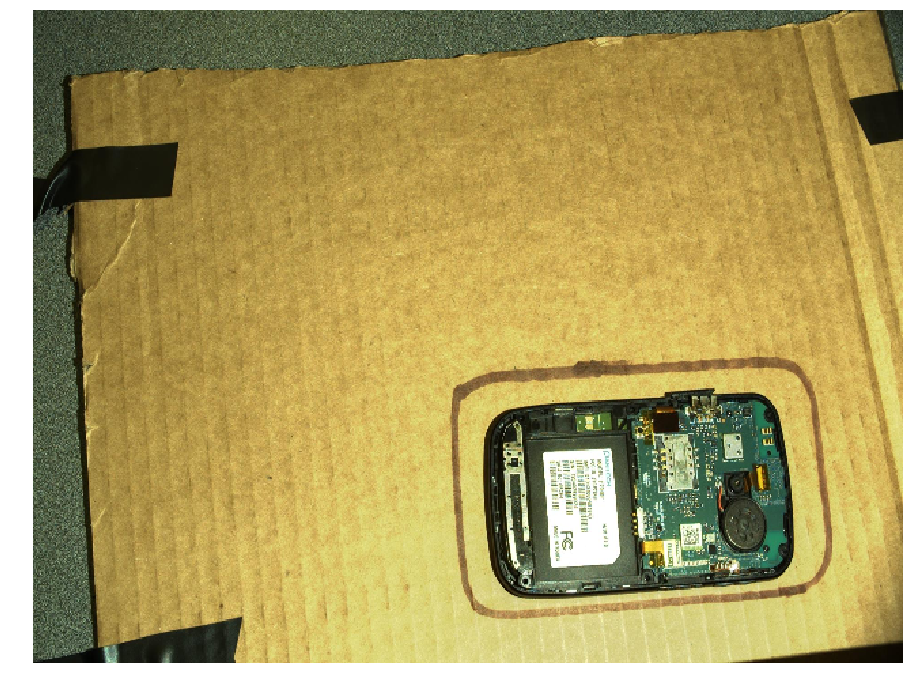

In [16]:
# compute predictions
predictions, p = coco_demo.run_on_opencv_image(image)
imshow(predictions)

In [48]:

for i in [p]:
    print ("Scores =", i.get_field('labels'))
    print ("Scores =", i.get_field('scores'))
    print ("BB = ", i.bbox)

Scores = tensor([], dtype=torch.int64)
Scores = tensor([])
BB =  tensor([], size=(0, 4))


# Save ground trouth and prediction

In [85]:
html = coco_dataset.display_image(image_id, use_url=False)
html = html.replace('img src="../', 'img src="/home/q/kashapov/maskrcnn-benchmark/')
imgkit.from_string(html, 'ground_trouth.png')

Image:
  height: 480
  width: 640
  id: 4
  file_name: 6_color.png
  segmentations (8):
    20:blue:{'supercategory': 'camera', 'id': 1, 'name': 'camera'}
    21:purple:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    22:red:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    23:green:{'supercategory': 'connector', 'id': 2, 'name': 'connector'}
    24:orange:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    25:salmon:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    26:pink:{'supercategory': 'screw', 'id': 4, 'name': 'screw'}
    27:gold:{'supercategory': 'motherboard', 'id': 3, 'name': 'motherboard'}


OSError: wkhtmltoimage reported an error:
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Loading page (1/2)
[>                                                           ] 0%[==============================>                             ] 50%[============================================================] 100%Rendering (2/2)                                                    
[>                                                           ] 0%[===============>                                            ] 25%Error: Could not save image                                       
[============================================================] 100%Done                                                               
Exit with code 1, due to unknown error.


In [68]:
im = Image.fromarray(predictions)
im.save("predictions.png", "PNG")